# Lab 1: Using Pandas

## Problem Description
- (1) Calculate the number of events that the price changes exceed $\pm$9% in the past year for each stock.
- (2) Rank these stocks by the event numbers.
- (3) Save the ranked table as a csv file.
- (4) Make time series plots for top 3 winners and top 3 losers; benchmark these assets by using rebase() to normalize each time series.
- (5) Make a scatter plot to see if there is a relation between profit & loss (P&L) and event numbers.
- (6) Save the scatter plot as a pdf file.

### Installation

In [1]:
%%capture

!pip install ffn 
!pip install --upgrade pandas_datareader

In [2]:
import ffn
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
          "figure.autolayout": True,
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'lines.linewidth': 2}

plt.rcParams.update(params)
%matplotlib inline

### Data Acquisition from ffn

In [6]:
tickers = "2609.tw, 3006.tw, 2603.tw, 3260.two, 5351.two, 2409.tw, 2388.tw, 1727.tw, 1711.tw, 2330.tw"
tbl = ffn.get(tickers, start = datetime.datetime.now() - datetime.timedelta(days = 365))
tbl

,2609tw,3006tw,2603tw,3260two,5351two,2409tw,2388tw,1727tw,1711tw,2330tw
Date,,,,,,,,,,
2021-03-02,27.100000,85.864159,35.804512,81.237129,25.299999,18.517563,49.282871,11.050000,16.148336,598.517700
2021-03-03,27.600000,89.623184,37.324978,79.777779,23.150000,18.961985,49.184505,11.050000,16.246803,611.293945
2021-03-04,26.600000,86.853378,36.589272,78.123848,22.799999,18.813843,48.741844,11.000000,16.296036,590.655457
2021-03-05,26.049999,86.061996,36.589272,76.859077,22.500000,18.270660,47.610603,10.950000,16.197571,590.655457
2021-03-08,26.799999,85.270622,36.638317,77.637405,22.000000,17.974380,46.184250,10.950000,16.099106,587.707092
...,...,...,...,...,...,...,...,...,...,...
2022-02-23,116.000000,151.000000,145.000000,99.500000,83.099998,20.700001,64.500000,40.700001,26.250000,625.000000
2022-02-24,112.500000,141.500000,141.500000,92.300003,77.599998,20.350000,61.500000,39.049999,25.350000,604.000000
2022-02-25,115.500000,143.500000,143.500000,92.900002,78.800003,20.549999,62.900002,39.099998,25.700001,604.000000


### Task (1)

Calculate the number of events that the price changes exceed $\pm$9% in the past year for each stock.

#### Approach 1: By Loop

In [8]:
%%time

pairs = dict()
for stock in tbl.columns:
    x = tbl[stock].pct_change() * 100
    pairs[stock] = np.sum((x > 9) | (x < -9))

pairs

CPU times: user 32.2 ms, sys: 407 µs, total: 32.6 ms
Wall time: 29.7 ms


{'2609tw': 31,
 '3006tw': 19,
 '2603tw': 34,
 '3260two': 13,
 '5351two': 25,
 '2409tw': 10,
 '2388tw': 14,
 '1727tw': 26,
 '1711tw': 8,
 '2330tw': 0}

#### Approach 2: By DataFrame API

In [9]:
%%time

tbl2 = tbl.pct_change().dropna().applymap(lambda x : np.abs(x) > 0.09).sum(axis = 0).to_dict()
tbl2

CPU times: user 33.3 ms, sys: 960 µs, total: 34.3 ms
Wall time: 31.6 ms


{'2609tw': 31,
 '3006tw': 19,
 '2603tw': 34,
 '3260two': 13,
 '5351two': 25,
 '2409tw': 10,
 '2388tw': 14,
 '1727tw': 26,
 '1711tw': 8,
 '2330tw': 0}

### Task (2)

Rank these stocks by the event numbers.

In [11]:
tbl2 = pd.DataFrame(data = {"Stock Ticker" : pairs.keys(), "Event Number" : pairs.values()})
tbl2.set_index("Stock Ticker", inplace = True)
tbl2.sort_values(by = "Event Number", inplace = True, ascending = False)
tbl2

,Event Number
Stock Ticker,
2603tw,34
2609tw,31
1727tw,26
5351two,25
3006tw,19
2388tw,14
3260two,13
2409tw,10
1711tw,8


### Task (3)

Save the ranked table as a csv file.

In [12]:
tbl2.to_csv("~/ramdisk/lab1.csv")

### Task (4)

Make time series plots for top 3 winners and top 3 losers; benchmark these assets by using rebase() to normalize each time series.

<AxesSubplot:title={'center':'Top 3 Winners'}, xlabel='Date', ylabel='RoI (%)'>

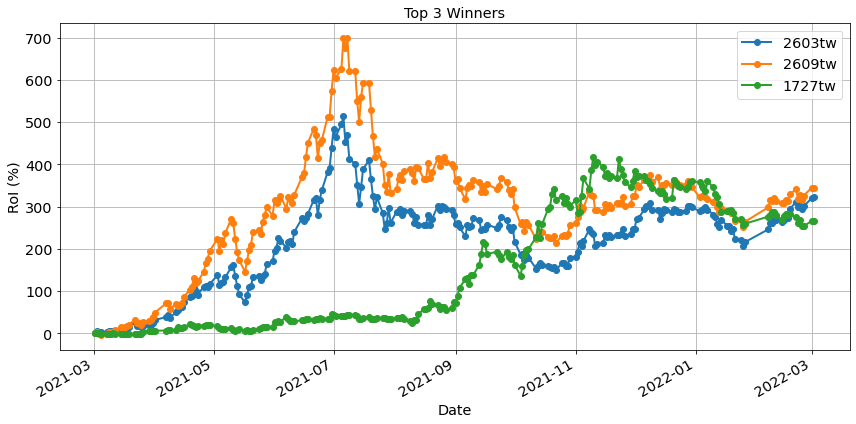

In [19]:
(tbl[tbl2.index[:3]].rebase() - 100).plot.line(figsize = (12, 6), marker = "o", grid = True, ylabel = "RoI (%)", title = "Top 3 Winners")

<AxesSubplot:title={'center':'Top 3 Losers'}, xlabel='Date', ylabel='RoI (%)'>

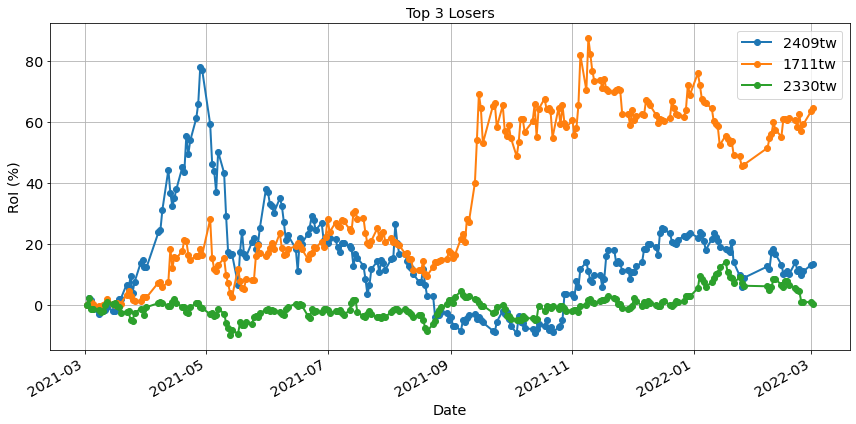

In [18]:
(tbl[tbl2.index[-3:]].rebase() - 100).plot.line(figsize = (12, 6), marker = "o", grid = True, ylabel = "RoI (%)", title = "Top 3 Losers")

### Task (5)

Make a scatter plot to see if there is a relation between RoI (%) and event numbers.
- First, we evaluate the RoI (%) by $\left(\,P_{N - 1}\,/\,P_0\,- 1\,\right)\,\times\,100$ for each stock.
- Then visualize your result by one scatter plot with the following requirement:
    - X axis: Event Number
    - Y axis: RoI (%).

#### How to Calculate the RoI (%)?
- Hint: read the code snippet in the previous cell.

In [20]:
tbl2["RoI (%)"] = (tbl.rebase() - 100).iloc[-1]

tbl2

,Event Number,RoI (%)
Stock Ticker,,
2603tw,34,323.131029
2609tw,31,344.649440
1727tw,26,265.610867
5351two,25,237.549423
3006tw,19,86.340846
2388tw,14,38.790618
3260two,13,19.895918
2409tw,10,13.405852
1711tw,8,64.413216


#### How to Make a Scatter Plot?
- References
    - https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html

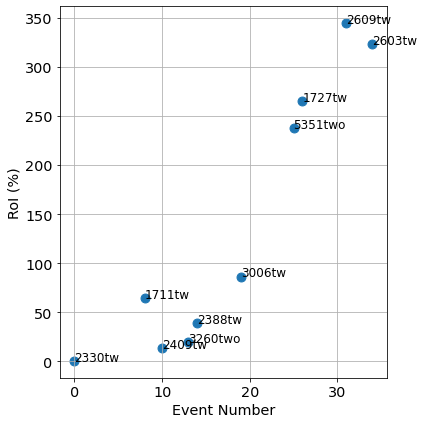

In [16]:
fig = tbl2.plot.scatter(x = "Event Number", y = "RoI (%)", figsize = (6, 6), marker = "o", s = 80, grid = True).get_figure()
for idx, ticker in enumerate(tbl2.index):
    plt.text(tbl2["Event Number"][idx], tbl2["RoI (%)"][idx], ticker, fontsize = 12)

### Task (6)

Save the scatter plot as a pdf file.

In [17]:
fig.savefig("output.pdf")

## Submission
- For physical courses, email this notebook to arthurzllu@gmail.com with your name in the mail title.
- For online courses, upload this notebook to NTU COOL.